<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/lab54_word_vector_rev101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding
- express words using vectors
- vectors are trained

# Word2Vec - 한국어

- 지금까지의 텍스트 코딩 방식인 One-hot encoding, BoW(단어모음)-문서-단어 행렬 방식은 모두 단어마다 고유번호를 배정하여 사용하지만, 이 번호들에는 아무런 의미가 포함되어 있지 않고 단지 인덱스 역할만 함.
- Word Vector 에서는
 - 단어를 고차원 공간상의 벡터로 표현함으로 단어간 거리 표현 가능. 차원이 높을수록 정교한 의미 구분 가능.
 - 보통 50~300 개 정도의 차원을 사용함
 - 단어간의 거리 (유사도) 뿐 아니라 방향성(벡터)도 찾을 수 있음.
 - 단어벡터의 각 성분이 어떤 의미를 갖는지는 알 수 없다.

- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)

## 뉴스를 이용한 단어 벡터 생성
- 단어 추출: konlpy 의 kkma() 사용
- 단어 벡터 생성: gensim 의 word2vec() 사용

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 40.3 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Kkma     # 형태소 분석 및 자연어 처리 모듈 (서울대)
from gensim.models.word2vec import Word2Vec

In [ ]:
# IT 뉴스기사를 이용한다
!wget https://bit.ly/2X7UON2 -O news2018.xlsx

--2023-09-07 13:56:38--  https://bit.ly/2X7UON2
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx [following]
--2023-09-07 13:56:38--  https://www.dropbox.com/s/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx [following]
--2023-09-07 13:56:40--  https://www.dropbox.com/s/raw/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc122e30e822d5c57ebfa3f2e161.dl.dropboxuserconte

In [ ]:
import pandas as pd
news = pd.read_excel("news2018.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
news.head(2)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출,본문,URL,분석제외 여부
0,1.500401e+06,20190228,국제신문,김태경 기자 tgkim@kookje.co.kr,빅딜이냐 스몰딜이냐 ‘영변 핵+α’ 로드맵 도출이 관건,정치>북한,정치>외교,NaN,NaN,NaN,NaN,"김,도널드 트럼프,김의겸,김정은","북미,미국,하노이,서울,싱가포르,북한,리비아","북미,북미 정상회,미국,청와대,북미 정상회담,북한,국무위","빅딜,스몰딜,영변,로드맵,도출,비핵화,수준,상응,조치,막판,양국,협상팀,밀당,1차,...","북미,비핵화,미국,스몰딜,1차,정상회담,김정은,종전선언,연락사무소,하노이,영변,대변...",- 비핵화 수준 상응 조치 놓고\n- 양국 협상팀 막판까지 ‘밀당’\n- 1차 때와...,http://www.kookje.co.kr/news2011/asp/newsbody....,NaN
1,1.200201e+06,20190228,경인일보,조영상,"하노이 도착후 실무대표단 청취 김정은, 북미회담 성공 '잰걸음'",국제>국제일반,정치>북한,NaN,NaN,NaN,NaN,김,"북미,하노이,베트남","조선중앙통신,국무위","하노이,도착,실무대표단,청취,김정은,잰걸음,북미회담,성공,김정은,국무,위원장,시작,...","실무대표단,하노이,김정은,위원장,베트남,북미정상회담,북미회담,정상회담,조선중앙통신,...",김정은 국무위원장이 27일 시작되는 제2차 북미정상회담 성공을 위해 심혈을 기울이고...,http://www.kyeongin.com/main/view.php?key=2019...,NaN


In [ ]:
news["본문"][:4]

0    - 비핵화 수준 상응 조치 놓고\n- 양국 협상팀 막판까지 ‘밀당’\n- 1차 때와...
1    김정은 국무위원장이 27일 시작되는 제2차 북미정상회담 성공을 위해 심혈을 기울이고...
2    북미가 처음으로 정상 간 단독회담과 만찬을 가지며 또다시 새로운 역사 창조에 나섰다...
3    지난해 9월 남북정상회담 당시 리선권 북한 조국평화통일위원장의 '냉면' 발언으로 정...
Name: 본문, dtype: object

In [ ]:
kkma = Kkma()

sentence_list = []
for sent in news["본문"]:

    sent_kkma_pos = kkma.nouns(sent)   # 명사만 추출
    word_list = []
    for word_pos in sent_kkma_pos:
        word_list.append(word_pos)

    sentence_list.append(word_list)

In [ ]:
print(sentence_list[0])

['비핵화', '수준', '상응', '조치', '양국', '협상', '협상팀', '팀', '막판', '당', '1', '1차', '차', '때', '시간', '조율', '단계적', '접근', '동의', '예상', '종전', '종전선언', '선언', '연락', '연락사무소', '사무소', '개설', '등', '조건', '조건부', '부', '제재', '완화', '명시', '가능성', '북미', '북미회담', '회담', '빅딜', '성공', '김', '김정은', '정은', '답방', '결과', '연관', '북한', '국무', '국무위원장', '위원장', '도', '도널드', '널드', '트럼프', '미국', '대통령', '27', '27일', '일', '친교', '만찬']


In [ ]:
for i in range(3):
    print(sentence_list[i])

['비핵화', '수준', '상응', '조치', '양국', '협상', '협상팀', '팀', '막판', '당', '1', '1차', '차', '때', '시간', '조율', '단계적', '접근', '동의', '예상', '종전', '종전선언', '선언', '연락', '연락사무소', '사무소', '개설', '등', '조건', '조건부', '부', '제재', '완화', '명시', '가능성', '북미', '북미회담', '회담', '빅딜', '성공', '김', '김정은', '정은', '답방', '결과', '연관', '북한', '국무', '국무위원장', '위원장', '도', '도널드', '널드', '트럼프', '미국', '대통령', '27', '27일', '일', '친교', '만찬']
['김', '김정은', '정은', '국무', '국무위원장', '위원장', '27', '27일', '일', '시작', '저', '2', '2차', '차', '북미', '북미정상회담', '정상', '회담', '성공', '심혈', '조선', '조선중앙통신', '중앙', '통신', '이날', '26', '26일', '하노이', '도착', '리', '호텔', '실무', '실무대표단', '대표단', '보고', '조미', '수뇌', '수뇌회담', '성공적', '보장', '나라', '현지', '파견', '사이', '접촉', '정형', '결과', '을', '구체적', '청취']
['북미', '처음', '정상', '간', '단독', '단독회담', '회담', '만찬', '역사', '창조', '결', '물', '도출', '북측', '영', '영변', '변', '핵', '핵시설', '시설', '폐기', '외', '추가', '추가적인', '적인', '비핵화', '조치', '미국', '금강산', '금강산관광', '관광', '등', '경제적', '체제', '체제보장', '보장', '여부', '양', '간', '톱', '담판', '김', '북한', '국무', '국무위원장', '위원장', '도', '도널드', '널드', '트럼

In [ ]:
news.shape, len(sentence_list)

((1543, 19), 1543)

In [ ]:
[len(w) for w in sentence_list][:10]

[61, 50, 63, 48, 44, 38, 38, 60, 52, 39]

In [ ]:
model = Word2Vec(sentence_list, sg=1, vector_size=100)   #sg=1 (skip-gram), 0(CBOW)

In [ ]:
model.wv["대한민국"]

array([-0.07256762,  0.08911698, -0.08715031,  0.06694995, -0.02313004,
       -0.20687076, -0.08649021,  0.27022415, -0.12703383,  0.06699064,
       -0.19853358, -0.19894233, -0.08257393,  0.0903063 , -0.01587087,
       -0.22113976, -0.12440667, -0.17581303, -0.07082193, -0.22830386,
        0.01671645,  0.15208966,  0.10263077, -0.02489537, -0.0847555 ,
       -0.0607877 , -0.14106874, -0.13739969, -0.03997231,  0.08325341,
        0.1181296 ,  0.00691835,  0.08035949, -0.09232999, -0.07280832,
        0.16970643,  0.01177657, -0.13537797, -0.0199808 , -0.25179365,
       -0.06590004, -0.21542123,  0.04601484,  0.06773228, -0.03333066,
       -0.14745252,  0.03126698, -0.1167407 , -0.033333  ,  0.11011206,
        0.04066307, -0.18464844, -0.03669032, -0.00577888, -0.01548745,
        0.01881286,  0.008017  , -0.03886173, -0.22605339, -0.01472617,
       -0.03438626,  0.13155322, -0.09151663, -0.13025953, -0.12849218,
        0.07206905,  0.03139649,  0.11283766, -0.12866852,  0.15

In [ ]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print("word {}/{} is {}".format(index, len(model.wv.index_to_key),word ))

word 0/1956 is 회담
word 1/1956 is 일
word 2/1956 is 북미
word 3/1956 is 차
word 4/1956 is 2
word 5/1956 is 정상
word 6/1956 is 2차
word 7/1956 is 김
word 8/1956 is 북한
word 9/1956 is 미국


In [ ]:
print(model.wv.most_similar("대한민국"))

[('대한', 0.9957154989242554), ('민국', 0.9945785403251648), ('정치인', 0.991466224193573), ('대선', 0.9898175001144409), ('전면', 0.9894934892654419), ('단체', 0.989432692527771), ('악화', 0.9894254207611084), ('탄력', 0.9885404706001282), ('제거', 0.9884876608848572), ('사', 0.9881974458694458)]


In [ ]:
print(model.wv.similarity("한국","미국"))
print(model.wv.similarity("한국","일본"))
print(model.wv.similarity("미국","일본"))

0.16039301
0.49715582
0.6331122


In [ ]:
# storing and loading the model
model.save('tmp_word2vec.model')
model = Word2Vec.load("tmp_word2vec.model")

In [ ]:
# a:b = c: ?
model.wv.most_similar(positive=['한국', '미국'], negative=['서울'])

[('핵', 0.5924729108810425),
 ('북핵', 0.590961754322052),
 ('대회', 0.5806800723075867),
 ('날짜', 0.5731920003890991),
 ('성명', 0.5731115937232971),
 ('행정부', 0.5703461766242981),
 ('북ㆍ미', 0.5702827572822571),
 ('널드', 0.5693925023078918),
 ('의회', 0.5664820075035095),
 ('최종', 0.5619248747825623)]

## Keras 에서 word2vec 훈련된 모델 사용하기 (그림형제 동화 예제)

In [ ]:
import requests
import re
res = requests.get('https://www.gutenberg.org/files/2591/2591-0.txt')
grimm = res.text[2801:530661]                 # 그림형제의 동화 일부만 사용
grimm = re.sub(r'[^a-zA-Z\. ]', ' ', grimm)   # not starting with [alphabets, ., space] -> ' ' in grimm
sentences = grimm.split('. ')                 # 문장 단위로 자름
data = [s.lower().split() for s in sentences]

In [ ]:
res.text[:100], len(res.text)

('ï»¿The Project Gutenberg eBook of Grimmsâ\x80\x99 Fairy Tales, by Jacob Grimm and Wilhelm Grimm\r\n\r\nThis eB',
 560045)

In [ ]:
len(data)  # number of sentences

3468

In [ ]:
print(data[:2])

[['second', 'story', 'the', 'salad', 'the', 'story', 'of', 'the', 'youth', 'who', 'went', 'forth', 'to', 'learn', 'what', 'fear', 'was', 'king', 'grisly', 'beard', 'iron', 'hans', 'cat', 'skin', 'snow', 'white', 'and', 'rose', 'red', 'the', 'brothers', 'grimm', 'fairy', 'tales', 'the', 'golden', 'bird', 'a', 'certain', 'king', 'had', 'a', 'beautiful', 'garden', 'and', 'in', 'the', 'garden', 'stood', 'a', 'tree', 'which', 'bore', 'golden', 'apples'], ['these', 'apples', 'were', 'always', 'counted', 'and', 'about', 'the', 'time', 'when', 'they', 'began', 'to', 'grow', 'ripe', 'it', 'was', 'found', 'that', 'every', 'night', 'one', 'of', 'them', 'was', 'gone']]


In [ ]:
import numpy as np

In [ ]:
len(data), [len(data[i]) for i in range(10)], np.shape(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(3468, [55, 26, 19, 26, 23, 41, 48, 21, 18, 32], (3468,))

In [ ]:
model = Word2Vec(data,             # 리스트 형태의 데이터
                 sg=1,             # 0: CBOW, 1: Skip-gram
                 vector_size=100,  # 벡터 크기
                 window=3,         # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=3,      # 사용할 단어의 최소 빈도(3회 이하 단어 무시)
                 workers=4)        # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)

In [ ]:
len(model.wv.index_to_key), model.wv.index_to_key[:3]          # 전체 단어의 갯수

(2278, ['the', 'and', 'to'])

In [ ]:
len(model.wv.key_to_index), [model.wv.key_to_index[i] for i in ['the', 'and', 'to']]

(2278, [0, 1, 2])

In [ ]:
model.wv.vectors.shape

(2278, 100)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

NUM_WORDS, EMB_DIM = model.wv.vectors.shape

emb = Embedding(input_dim=NUM_WORDS, output_dim=EMB_DIM,
                trainable=False, weights=[model.wv.vectors])   # pre-trained weights
keras_model = Sequential()
keras_model.add(emb)
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         227800    
                                                                 
Total params: 227,800
Trainable params: 0
Non-trainable params: 227,800
_________________________________________________________________


In [ ]:
i = model.wv.key_to_index['princess']; i

150

In [ ]:
model.wv['princess']

array([-0.00695892,  0.17375733,  0.04456573,  0.01114895,  0.09468016,
       -0.18058646,  0.13792826,  0.40240207, -0.13765974, -0.27655154,
       -0.07184786, -0.39199242,  0.0387387 ,  0.10020339,  0.04268656,
       -0.10522345,  0.1873609 , -0.03534386, -0.01092807, -0.35921362,
        0.15367466,  0.08903914,  0.18724665, -0.09519931, -0.00214643,
        0.1011335 , -0.09533204, -0.00863734, -0.21188506,  0.09051664,
        0.14478771, -0.06185848,  0.12733728, -0.24312842, -0.11572465,
        0.15930709,  0.00836015, -0.08920947, -0.11537572, -0.23231295,
       -0.1250649 , -0.01019364, -0.1593282 , -0.1427351 ,  0.03422406,
       -0.06868449, -0.10351817, -0.07706441,  0.22844721,  0.06094399,
        0.1773585 , -0.16935614, -0.144626  , -0.08931911,  0.08241267,
       -0.08246881,  0.01871883,  0.01368912, -0.09212566,  0.28049672,
       -0.07941839, -0.21613191,  0.07803544,  0.03135386, -0.10234172,
        0.18195133, -0.00054273,  0.11391727, -0.2747157 ,  0.22

In [ ]:
keras_model(i)   # the same

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-0.00695892,  0.17375733,  0.04456573,  0.01114895,  0.09468016,
       -0.18058646,  0.13792826,  0.40240207, -0.13765974, -0.27655154,
       -0.07184786, -0.39199242,  0.0387387 ,  0.10020339,  0.04268656,
       -0.10522345,  0.1873609 , -0.03534386, -0.01092807, -0.35921362,
        0.15367466,  0.08903914,  0.18724665, -0.09519931, -0.00214643,
        0.1011335 , -0.09533204, -0.00863734, -0.21188506,  0.09051664,
        0.14478771, -0.06185848,  0.12733728, -0.24312842, -0.11572465,
        0.15930709,  0.00836015, -0.08920947, -0.11537572, -0.23231295,
       -0.1250649 , -0.01019364, -0.1593282 , -0.1427351 ,  0.03422406,
       -0.06868449, -0.10351817, -0.07706441,  0.22844721,  0.06094399,
        0.1773585 , -0.16935614, -0.144626  , -0.08931911,  0.08241267,
       -0.08246881,  0.01871883,  0.01368912, -0.09212566,  0.28049672,
       -0.07941839, -0.21613191,  0.07803544,  0.03135386, -0.10234172,
        0.181951

In [ ]:
keras_model(i) == keras_model.predict([i])

1/1 [==============================] - 0s 130ms/step


<tf.Tensor: shape=(1, 100), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])>

In [ ]:
model.wv['princess'] == keras_model(i)

<tf.Tensor: shape=(100,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

## Keras 에서 직접 Word2Vec 훈련도 가능
- http://doc.mindscale.kr/km/unstructured/11.html

## NLTK 이용한 문장의 유사도
- NLTK (Natural Language ToolKit) 라이브러리 사용

In [ ]:
!pip install nltk

In [ ]:
# simple exercise
import nltk
nltk.download('punkt')
sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [ ]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

- 'IN' - preposition or subordinating conjunction
- 'CD' - cardinal number. In English, cardinal numbers are words for specific numbers like one, two, three, etc.
- 'NN' - noun, singular or mass
- 'NNP' - proper noun (고유명사), singular
- ask ChatGPT for more

In [ ]:
# edit_distance: 문자열이 얼마나 다른지 편집거리를 이용해 유사도 판단
sentence_list = ["우리 모두 함께 놀자", "모두 같이 놀자", "놀자", "모두 다 같이"]

for i in sentence_list:
    print("'", i, "'")
    for j in sentence_list:
        print("\t", j, " : ", end='')
        print(nltk.edit_distance(i, j), )
    print()

' 우리 모두 함께 놀자 '
	 우리 모두 함께 놀자  : 0
	 모두 같이 놀자  : 5
	 놀자  : 9
	 모두 다 같이  : 7

' 모두 같이 놀자 '
	 우리 모두 함께 놀자  : 5
	 모두 같이 놀자  : 0
	 놀자  : 6
	 모두 다 같이  : 4

' 놀자 '
	 우리 모두 함께 놀자  : 9
	 모두 같이 놀자  : 6
	 놀자  : 0
	 모두 다 같이  : 7

' 모두 다 같이 '
	 우리 모두 함께 놀자  : 7
	 모두 같이 놀자  : 4
	 놀자  : 7
	 모두 다 같이  : 0



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

sentence_list = ['우리 모두 함께 놀자','모두 같이 놀자']

tfidf = TfidfVectorizer()
tfidf_vec = tfidf.fit_transform(sentence_list)

count = CountVectorizer()
count_vec = count.fit_transform(sentence_list)

In [ ]:
tfidf.get_feature_names_out()

array(['같이', '놀자', '모두', '우리', '함께'], dtype=object)

In [ ]:
tfidf_vec.toarray()

array([[0.        , 0.40993715, 0.40993715, 0.57615236, 0.57615236],
       [0.70490949, 0.50154891, 0.50154891, 0.        , 0.        ]])

In [ ]:
# similarity of two sentences

from sklearn.metrics.pairwise import cosine_similarity

tfidf_cosine = cosine_similarity(tfidf_vec[0].toarray(), tfidf_vec[1].toarray())[0][0]
count_cosine = cosine_similarity(count_vec[0].toarray(), count_vec[1].toarray())[0][0]

print("tfidf consine similarity : ", tfidf_cosine)
print("countvectorizer consine similarity : ", count_cosine)

tfidf consine similarity :  0.4112070550676187
countvectorizer consine similarity :  0.5773502691896258


In [ ]:
# 직접 구현시 코사인 유사도
import numpy as np

def my_cosine_similarity(x, y):  # x, y arrays
    return np.sum(x*y) / np.sqrt((np.sum(x**2)*np.sum(y**2)))

my_tfidf = my_cosine_similarity(tfidf_vec.toarray()[0], tfidf_vec.toarray()[1])
my_count = my_cosine_similarity(count_vec.toarray()[0], count_vec.toarray()[1])

print("my tfidf consine similarity : ", my_tfidf)
print("my countvectorizer consine similarity : ", my_count)

my tfidf consine similarity :  0.4112070550676187
my countvectorizer consine similarity :  0.5773502691896258


In [ ]:
# Jaccard similarity
sentence_list = ['우리 모두 함께 놀자','모두 같이 놀자']

def get_jaccard_sim(str1, str2):
    a = set(str1.split())
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

get_jaccard_sim(sentence_list[0], sentence_list[1])

0.4

# Word2Vec - English
- https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
- word2vec version 3 -> 4: changes in functions
  - see https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
  - size -> vector_size
  - index2word and index2entity -> index_to_key
  - vocab[dict] -> key_to_index[dict]
  - most_similar(), wmdistance(), doesnt_match(), similarity(), & others moved to KeyedVectors (model.wv)

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			 ['this', 'is', 'the', 'second', 'sentence'],
			 ['yet', 'another', 'sentence'],
		 	 ['one', 'more', 'sentence'],
			 ['and', 'the', 'final', 'sentence']]

new_sentences = [['this', 'is', 'the', 'main', 'sentence'],
                 ['very', 'important', 'sentence']]

# construct model (with initial train)
model = Word2Vec(sentences, min_count=1, vector_size=5)  # automatially train it

# continue training with the new data
model.build_vocab(new_sentences, update=True)
model.train(new_sentences, total_examples=len(new_sentences), epochs=10)

# summarize the loaded model
print(model)

Word2Vec<vocab=17, vector_size=5, alpha=0.025>


In [ ]:
# summarize vocabulary (to see learned vocabulary of tokens (words) )
model.wv.key_to_index

{'sentence': 0,
 'the': 1,
 'is': 2,
 'this': 3,
 'final': 4,
 'and': 5,
 'more': 6,
 'one': 7,
 'another': 8,
 'yet': 9,
 'second': 10,
 'word2vec': 11,
 'for': 12,
 'first': 13,
 'main': 14,
 'very': 15,
 'important': 16}

In [ ]:
# access vector for one word
words = list(model.wv.key_to_index.keys())
words

['sentence',
 'the',
 'is',
 'this',
 'final',
 'and',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first',
 'main',
 'very',
 'important']

In [ ]:
model.wv['sentence']

array([-0.01072454,  0.00472863,  0.10206699,  0.18018547, -0.186059  ],
      dtype=float32)

In [ ]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=17, vector_size=5, alpha=0.025>


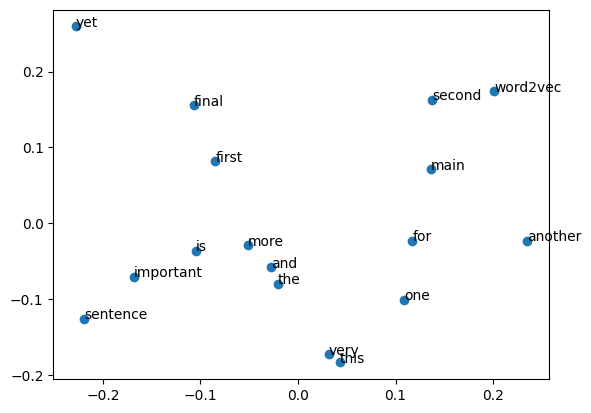

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index.keys())
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# Using pre-trained Word2Vec model
- GoogleNews-vectors-negative300.bin
- Korean version "ko.vec" available

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

- Its size is too big (bigger than 1.6 GB) and downloading may not be possible.

In [ ]:
# skipped because of its huge size
'''
!wget -P ./ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
EMBEDDING_FILE = './GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)
print(word_vectors.vectors.shape)
'''

'\n!wget -P ./ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"\nEMBEDDING_FILE = \'./GoogleNews-vectors-negative300.bin.gz\'\nword_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)\nprint(word_vectors.vectors.shape)\n'

- Pre-trained Word2Vec
  - for english: (about 3 GB, and takes long to download): https://code.google.com/archive/p/word2vec
  - word vectors of 30+ languages: https://github.com/Kyubyong/wordvectors

# Glove - pretrained word embedder

In [ ]:
import gensim.downloader as api

glove_model = api.load('glove-twitter-25')

[=================================================-] 98.9% 103.7/104.8MB downloaded


In [ ]:
glove_model['computer']

array([ 0.64005 , -0.019514,  0.70148 , -0.66123 ,  1.1723  , -0.58859 ,
        0.25917 , -0.81541 ,  1.1708  ,  1.1413  , -0.15405 , -0.11369 ,
       -3.8414  , -0.87233 ,  0.47489 ,  1.1541  ,  0.97678 ,  1.1107  ,
       -0.14572 , -0.52013 , -0.52234 , -0.92349 ,  0.34651 ,  0.061939,
       -0.57375 ], dtype=float32)

In [ ]:
words = ["soccer", "football", "baseball", "volleyball", "basketball", "tennis",
         "persimmon", "softball", "apple", "hockey", "orange", "pear", "strawberry",
         "eat", "drink", "taste", "talk", "speak", "study", "research", "have", "take"]
mat = glove_model[words]
mat.shape

(22, 25)

In [ ]:
v_apple = glove_model["apple"]
v_mango = glove_model["mango"]
print(v_apple.shape)
print(v_mango.shape)
cosine_similarity([v_mango],[v_apple])

(25,)
(25,)


array([[0.52559555]], dtype=float32)

In [ ]:
glove_model.most_similar(["apple"]), glove_model.most_similar("tiger")

([('windows', 0.8948712944984436),
  ('microsoft', 0.8858076333999634),
  ('google', 0.8823867440223694),
  ('galaxy', 0.8806391358375549),
  ('flash', 0.8793812394142151),
  ('android', 0.8782057762145996),
  ('nokia', 0.8770236372947693),
  ('samsung', 0.8697316646575928),
  ('chrome', 0.8691699504852295),
  ('ipad', 0.8670315742492676)],
 [('eagle', 0.9295039772987366),
  ('blue', 0.8847297430038452),
  ('white', 0.8836454749107361),
  ('hawk', 0.8832809925079346),
  ('wing', 0.8700830936431885),
  ('golden', 0.8699467778205872),
  ('woods', 0.8693599104881287),
  ('wild', 0.8683100342750549),
  ('classic', 0.8648809194564819),
  ('yellow', 0.8638952970504761)])

- king - man + woman

In [ ]:
glove_model.most_similar(positive=["king","woman"], negative=["man"])

[('meets', 0.8841924071311951),
 ('prince', 0.832163393497467),
 ('queen', 0.8257461190223694),
 ('’s', 0.8174097537994385),
 ('crow', 0.813499391078949),
 ('hunter', 0.8131037950515747),
 ('father', 0.8115834593772888),
 ('soldier', 0.81113600730896),
 ('mercy', 0.8082392811775208),
 ('hero', 0.8082264065742493)]

In [ ]:
import matplotlib.pyplot as plt

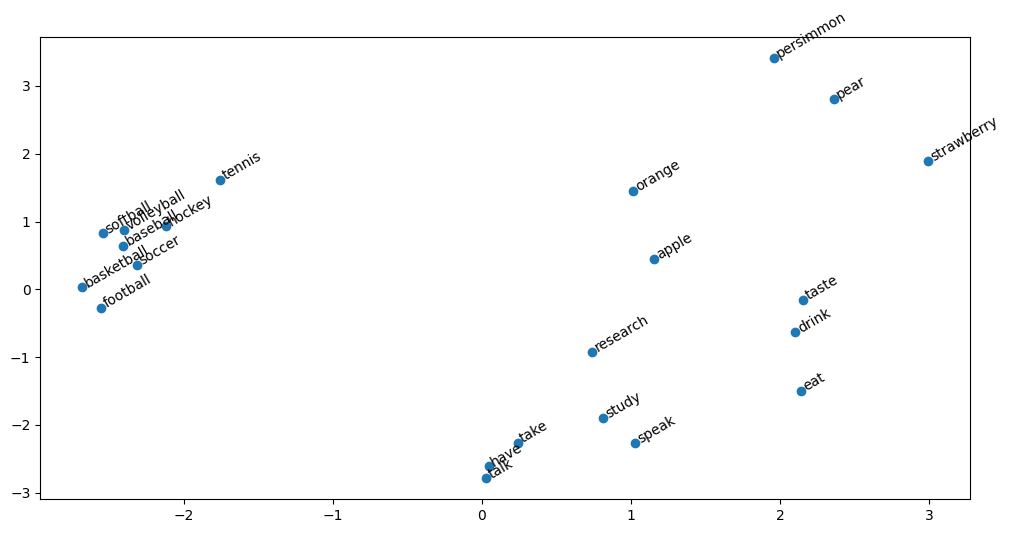

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(mat)
xs = xys[:,0]
ys = xys[:,1]

plt.figure(figsize=(12,6))
plt.scatter(xs, ys)

for i, word in enumerate(words):
    plt.annotate(word, xy=(xs[i], ys[i]), rotation=30)
plt.show()

# difference between Glove and Word2Vec
- Both word2vec and glove enable us to represent a word in the form of a vector (often called embedding). They are the two most popular algorithms for word embeddings that bring out the semantic similarity of words that captures different facets of the meaning of a word.
- Word2vec embeddings are based on training a shallow feedforward neural network while glove embeddings are learnt based on matrix factorization techniques.
- Glove model is based on leveraging global word to word co-occurance counts leveraging the entire corpus. Word2vec on the other hand leverages co-occurance within local context (neighbouring words).
- In practice, however, both these models give similar results for many tasks. ​_Factors such as the dataset on which these models are trained, length of the vectors and so on seem to have a bigger impact than the models themselves. For instance, if I am using these models to derive  the features for a medical application, I can significantly improve performance by training on dataset from the medical domain.

# Doc2Vec
- extension of Word2Vec
- https://lovit.github.io/nlp/representation/2018/03/26/word_doc_embedding/
- doc2vec을 만드는 과정에서 word2vec 모델이 필요하므로 필연적으로 word2vec도 생성

In [ ]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data = ["I love machine learning. Its awesome.",
        "I love coding in python",
        "I love building chatbots",
        "they chat amagingly well"]

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

In [ ]:
tagged_data

[TaggedDocument(words=['i', 'love', 'machine', 'learning', '.', 'its', 'awesome', '.'], tags=['0']),
 TaggedDocument(words=['i', 'love', 'coding', 'in', 'python'], tags=['1']),
 TaggedDocument(words=['i', 'love', 'building', 'chatbots'], tags=['2']),
 TaggedDocument(words=['they', 'chat', 'amagingly', 'well'], tags=['3'])]

In [ ]:
max_epochs = 100
vec_size = 5
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha,
                min_alpha=0.00025,
                min_count=1,
                dm =1)    # dm=1:preserves word order, 0: do not preserve order

model.build_vocab(tagged_data)   # build a vocabulary

In [ ]:
model.corpus_count, model.epochs

(4, 10)

In [ ]:
for epoch in range(max_epochs):
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)

    model.alpha -= 0.0002           # decrease the learning rate
    model.min_alpha = model.alpha   # fix the learning rate, no decay

model.save("d2v.model")

In [ ]:
model= Doc2Vec.load("d2v.model")

In [ ]:
model.dv.index_to_key

['0', '1', '2', '3']

In [ ]:
model.dv.key_to_index

{'0': 0, '1': 1, '2': 2, '3': 3}

In [ ]:
model.dv.vectors

array([[-2.3132663 , -1.4919854 , -2.3823936 ,  0.221911  ,  0.268456  ],
       [-0.4007934 , -1.5227457 , -1.0852029 , -1.7978665 ,  0.26653314],
       [-0.7103097 , -0.07994173, -1.5551385 , -1.4169221 , -0.51763344],
       [-2.4686174 , -0.2587027 ,  0.8770108 , -2.341612  , -0.68179893]],
      dtype=float32)

In [ ]:
# to infer a new document vector
test_data = word_tokenize("I love chatbots".lower())
new_v = model.infer_vector(test_data)
print(test_data)
print("new vector inferred: ", new_v)

['i', 'love', 'chatbots']
new vector inferred:  [-0.05348476  0.06185523 -0.08324091 -0.07776066  0.02138327]


In [ ]:
model.dv.similar_by_vector(new_v)

[('2', 0.8084102869033813),
 ('1', 0.4357915222644806),
 ('0', 0.4207039177417755),
 ('3', 0.413604736328125)]

In [ ]:
# to find most similar doc using tags (it uses word-vectors.)
similar_doc = model.dv.most_similar('1')
print(similar_doc)

[('2', 0.7482125759124756), ('0', 0.5655903816223145), ('3', 0.4710536599159241)]


In [ ]:
# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.dv['1'])

[-0.4007934  -1.5227457  -1.0852029  -1.7978665   0.26653314]


# Exercise (연습)

### KKma() 연습

In [ ]:
# KoNLPy: 형태소 (뜻을 가진 최소 언어 단위) 분석
# kkma: Korean morpheme analyzer
# https://konlpy.org/ko/latest/morph/#pos-tagging-with-konlpy
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.sentences('네, 안녕하세요. 반갑습니다.'))
print(kkma.nouns('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))
print(kkma.pos('오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))
# pos (part-of-speech): 품사 (명사, 동사, ...)

['네, 안녕하세요.', '반갑습니다.']
['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']
[('오류', 'NNG'), ('보고', 'NNG'), ('는', 'JX'), ('실행', 'NNG'), ('환경', 'NNG'), (',', 'SP'), ('에러', 'NNG'), ('메세지', 'NNG'), ('와', 'JKM'), ('함께', 'MAG'), ('설명', 'NNG'), ('을', 'JKO'), ('최대한', 'NNG'), ('상세히', 'MAG'), ('!', 'SF'), ('^^', 'EMO')]
